<a href="https://colab.research.google.com/github/Yaroslavwvw/UPSYS/blob/main/%D0%A3%D0%9F%D0%98%D0%A1_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%964_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B0%D0%B7%D1%8B_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B4%D0%BB%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №4. Проектирование базы данных для информационной системы**

## **Введение**

База данных является фундаментом любой информационной системы, обеспечивая надежное хранение, эффективный доступ и целостность данных. В контексте управления проектами создания информационных систем грамотное проектирование базы данных критически важно для успеха всего проекта, поскольку ошибки на этом этапе могут привести к серьезным проблемам производительности, масштабируемости и поддержки системы в будущем.

## **Формулировка задания**

На основе ранее разработанных концептуальных основ проекта, иерархической структуры работ и UML-диаграмм, спроектируйте реляционную базу данных для вашей информационной системы. Результатом работы должна стать ER-диаграмма (Entity-Relationship Diagram), отражающая структуру данных, необходимых для функционирования вашего проекта.

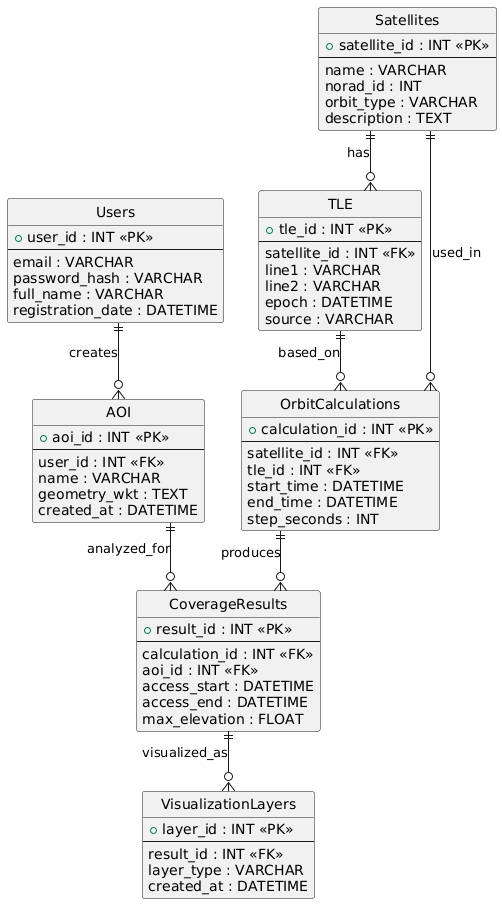

## 2. Пояснение структуры базы данных (описание ERD)
### 2.1. Общая логика проектирования

Реляционная база данных разработана для хранения и обработки данных, необходимых для анализа наблюдаемости территории спутниками дистанционного зондирования Земли.
Проектирование выполнено на основе ранее разработанных UML-диаграмм (диаграммы классов, компонентов и последовательностей), что обеспечивает логическую согласованность архитектуры системы.

Все таблицы приведены к третьей нормальной форме (3НФ), что исключает избыточность данных и предотвращает аномалии вставки, обновления и удаления.

### 2.2. Описание сущностей
- Users

Таблица предназначена для хранения информации о пользователях системы.
Каждая запись однозначно идентифицируется первичным ключом user_id.
Все атрибуты зависят только от первичного ключа и не имеют транзитивных зависимостей.

- Satellites

Справочная таблица спутников, используемых в системе.
Содержит уникальный NORAD-идентификатор и описание орбитального типа.
Используется другими таблицами исключительно через внешний ключ satellite_id.

- TLE

Таблица хранения орбитальных элементов спутников в формате Two-Line Element.
Каждая запись связана с конкретным спутником через внешний ключ satellite_id.
Хранение TLE вынесено в отдельную таблицу, что соответствует требованиям нормализации и позволяет учитывать обновления орбитальных данных во времени.

- AOI (Area of Interest)

Таблица областей интереса, задаваемых пользователями.
Геометрия хранится в виде WKT-представления, что обеспечивает совместимость с ГИС-анализом.
Каждая область принадлежит конкретному пользователю.

- OrbitCalculations

Таблица хранит параметры расчётов орбитального движения спутников.
Связывает спутник и конкретную версию TLE, используемую для расчёта, что обеспечивает воспроизводимость результатов.

- CoverageResults

Таблица результатов анализа наблюдаемости.
Содержит временные окна доступности спутника над заданной областью интереса и максимальный угол возвышения.
Результаты зависят от конкретного расчёта и AOI.

- VisualizationLayers

Таблица метаданных визуализации результатов анализа.
Позволяет хранить различные представления данных (орбиты, зоны покрытия, временные окна) без дублирования расчётных данных.

## 3. Соответствие третьей нормальной форме (3НФ)

База данных удовлетворяет требованиям 3НФ:

- все атрибуты являются атомарными (1НФ);

- отсутствуют частичные зависимости от составных ключей (2НФ);

- отсутствуют транзитивные зависимости между неключевыми атрибутами (3НФ).

Каждая таблица описывает одну сущность, а связи между сущностями реализованы через внешние ключи.

## 4. Связь с UML-диаграммами

- сущности Satellite, TLE, AOI, CoverageResult напрямую соответствуют классам диаграммы классов;

- таблица OrbitCalculations отражает вычислительный сценарий диаграммы последовательности;

- таблица VisualizationLayers соответствует компоненту визуализации на диаграмме компонентов.

Таким образом, ER-диаграмма является логическим продолжением UML-моделирования и полностью согласуется с архитектурой информационной системы.

## **Теоретическая часть: Основы проектирования реляционных баз данных**

### **1. Понятие реляционной базы данных**

**Реляционная база данных** — это совокупность взаимосвязанных таблиц, в которых данные организованы в виде строк и столбцов. Концепция была предложена Эдгаром Коддом в 1970 году и стала доминирующей моделью организации данных благодаря своей простоте, математической строгости и универсальности.



#### **Основные понятия реляционной модели:**



- **Отношение (таблица)** — двумерная структура, состоящая из строк и столбцов
- **Кортеж (строка, запись)** — набор значений атрибутов, представляющий один объект
- **Атрибут (столбец, поле)** — именованное свойство отношения
- **Домен** — множество допустимых значений атрибута
- **Первичный ключ** — атрибут или комбинация атрибутов, однозначно идентифицирующая каждую запись
- **Внешний ключ** — атрибут, ссылающийся на первичный ключ другой таблицы


#### **Общий пример — База данных интернет-магазина:**




| customer_id | first_name | last_name | email | registration_date |
|-------------|------------|-----------|-------|-------------------|
| 1 | Иван | Петров | ivan@mail.ru | 2025-01-15 |
| 2 | Мария | Сидорова | maria@gmail.com | 2025-01-20 |
| 3 | Алексей | Козлов | alex@yandex.ru | 2025-02-01 |

В этой таблице:
- **customer_id** — первичный ключ
- **first_name, last_name, email** — атрибуты
- Каждая строка — кортеж, представляющий одного покупателя
- **email** имеет домен — множество валидных email-адресов

### **2. Типы связей между таблицами**

#### **2.1. Один-к-одному (1:1)**

Каждой записи в первой таблице соответствует максимум одна запись во второй таблице.



**Общий пример:**

Таблица **Employees** (Сотрудники):
| employee_id | name | department |
|-------------|------|------------|
| 1 | Иван Петров | IT |
| 2 | Мария Сидорова | HR |



Таблица **EmployeeDetails** (Подробная информация о сотрудниках):
| detail_id | employee_id | passport | inn |
|-----------|-------------|----------|-----|
| 1 | 1 | 4515 123456 | 123456789012 |
| 2 | 2 | 4516 654321 | 987654321098 |

#### **2.2. Один-ко-многим (1:N)**

Одной записи в первой таблице может соответствовать несколько записей во второй.

**Общий пример:**

Таблица **Departments** (Отделы):
| dept_id | dept_name |
|---------|-----------|
| 1 | Разработка |
| 2 | Маркетинг |



Таблица **Employees** (Сотрудники):
| emp_id | emp_name | dept_id |
|--------|----------|---------|
| 1 | Иван | 1 |
| 2 | Петр | 1 |
| 3 | Мария | 2 |

#### **2.3. Многие-ко-многим (N:M)**

Множеству записей в первой таблице соответствует множество записей во второй. Реализуется через промежуточную таблицу.

**Общий пример:**



Таблица **Students** (Студенты):
| student_id | name |
|------------|------|
| 1 | Алексей |
| 2 | Ольга |


Таблица **Courses** (Курсы):
| course_id | title |
|-----------|-------|
| 1 | Математика |
| 2 | Физика |






Таблица **StudentCourses** (Связующая таблица):
| student_id | course_id | grade |
|------------|-----------|-------|
| 1 | 1 | 5 |
| 1 | 2 | 4 |
| 2 | 1 | 4 |

### **3. Нормализация базы данных**

**Нормализация** — это процесс организации данных для минимизации избыточности и обеспечения целостности данных.

#### **3.1. Типовые ошибки проектирования (ненормализованная таблица)**

**Пример плохо спроектированной таблицы:**



| order_id | customer_name | customer_email | customer_phone | product_names | product_prices | total |
|----------|---------------|----------------|----------------|---------------|----------------|-------|
| 1 | Иван Петров | ivan@mail.ru | +7900111, +7900222 | Ноутбук, Мышь | 50000, 1000 | 51000 |
| 2 | Иван Петров | ivan@mail.ru | +7900111, +7900222 | Клавиатура | 3000 | 3000 |
| 3 | Мария Сидорова | maria@ya.ru | +7900333 | Монитор, Кабель, Мышь | 20000, 500, 1000 | 21500 |



**Проблемы этой таблицы:**
- **Избыточность данных** — информация о клиенте дублируется в каждом заказе
- **Аномалии обновления** — при изменении email клиента нужно обновить множество записей
- **Аномалии удаления** — удаляя последний заказ клиента, мы теряем информацию о нем
- **Множественные значения в одном поле** — телефоны и товары хранятся через запятую
- **Невозможность эффективного поиска** — сложно найти все заказы конкретного товара

#### **3.2. Первая нормальная форма (1НФ)**

Таблица находится в 1НФ, если:
- Все атрибуты содержат атомарные (неделимые) значения
- Каждый столбец содержит значения одного типа
- Каждый столбец имеет уникальное имя
- Порядок строк не имеет значения

**Приведение к 1НФ:**



Таблица **Orders**:
| order_id | customer_id | order_date | total |
|----------|-------------|------------|-------|
| 1 | 1 | 2025-01-15 | 51000 |
| 2 | 1 | 2025-01-20 | 3000 |
| 3 | 2 | 2025-01-25 | 21500 |


Таблица **Customers**:
| customer_id | name | email |
|-------------|------|-------|
| 1 | Иван Петров | ivan@mail.ru |
| 2 | Мария Сидорова | maria@ya.ru |

Таблица **CustomerPhones**:
| phone_id | customer_id | phone_number |
|----------|-------------|--------------|
| 1 | 1 | +7900111 |
| 2 | 1 | +7900222 |
| 3 | 2 | +7900333 |








Таблица **OrderItems**:
| item_id | order_id | product_name | price | quantity |
|---------|----------|--------------|-------|----------|
| 1 | 1 | Ноутбук | 50000 | 1 |
| 2 | 1 | Мышь | 1000 | 1 |
| 3 | 2 | Клавиатура | 3000 | 1 |
| 4 | 3 | Монитор | 20000 | 1 |
| 5 | 3 | Кабель | 500 | 1 |
| 6 | 3 | Мышь | 1000 | 1 |

#### **3.3. Вторая нормальная форма (2НФ)**

Таблица находится во 2НФ, если:
- Она находится в 1НФ
- Все неключевые атрибуты полностью функционально зависят от первичного ключа


**Пример нарушения 2НФ:**

| order_id | product_id | product_name | category | quantity | price |
|----------|------------|--------------|----------|----------|-------|
| 1 | 101 | Ноутбук | Электроника | 1 | 50000 |
| 1 | 102 | Мышь | Аксессуары | 1 | 1000 |
| 2 | 102 | Мышь | Аксессуары | 2 | 1000 |

**Проблема:** product_name и category зависят только от product_id, а не от составного ключа (order_id, product_id).

**Приведение к 2НФ:**


Таблица **Products**:
| product_id | product_name | category | price |
|------------|--------------|----------|-------|
| 101 | Ноутбук | Электроника | 50000 |
| 102 | Мышь | Аксессуары | 1000 |







Таблица **OrderItems**:
| order_id | product_id | quantity |
|----------|------------|----------|
| 1 | 101 | 1 |
| 1 | 102 | 1 |
| 2 | 102 | 2 |

### **4. Проектирование БД для мобильного приложения классификации кожных заболеваний**

#### **4.1. Определение сущностей и их атрибутов**

Для мобильного приложения классификации кожных заболеваний определим основные сущности:

**Users** (Пользователи):
- user_id — уникальный идентификатор
- email — электронная почта
- password_hash — хэш пароля
- full_name — полное имя
- date_of_birth — дата рождения
- gender — пол
- skin_type — тип кожи
- registration_date — дата регистрации

**SkinPhotos** (Фотографии кожи):
- photo_id — уникальный идентификатор
- user_id — владелец фото (внешний ключ)
- image_path — путь к файлу
- thumbnail_path — путь к миниатюре
- body_part — часть тела
- upload_date — дата загрузки
- image_quality — качество изображения

**Analyses** (Анализы):
- analysis_id — уникальный идентификатор
- photo_id — анализируемое фото (внешний ключ)
- analysis_date — дата анализа
- ml_model_version — версия ML-модели
- processing_time_ms — время обработки
- status — статус анализа

**Diseases** (Заболевания):
- disease_id — уникальный идентификатор
- disease_name — название заболевания
- disease_description — описание
- symptoms — симптомы
- treatment — лечение
- severity_level — уровень серьезности
- contagious — заразность

**AnalysisDiseases** (Результаты анализа):
- analysis_id — идентификатор анализа
- disease_id — идентификатор заболевания
- confidence_score — уверенность в диагнозе
- is_primary — основной диагноз

#### **4.2. Схема базы данных на MySQL**

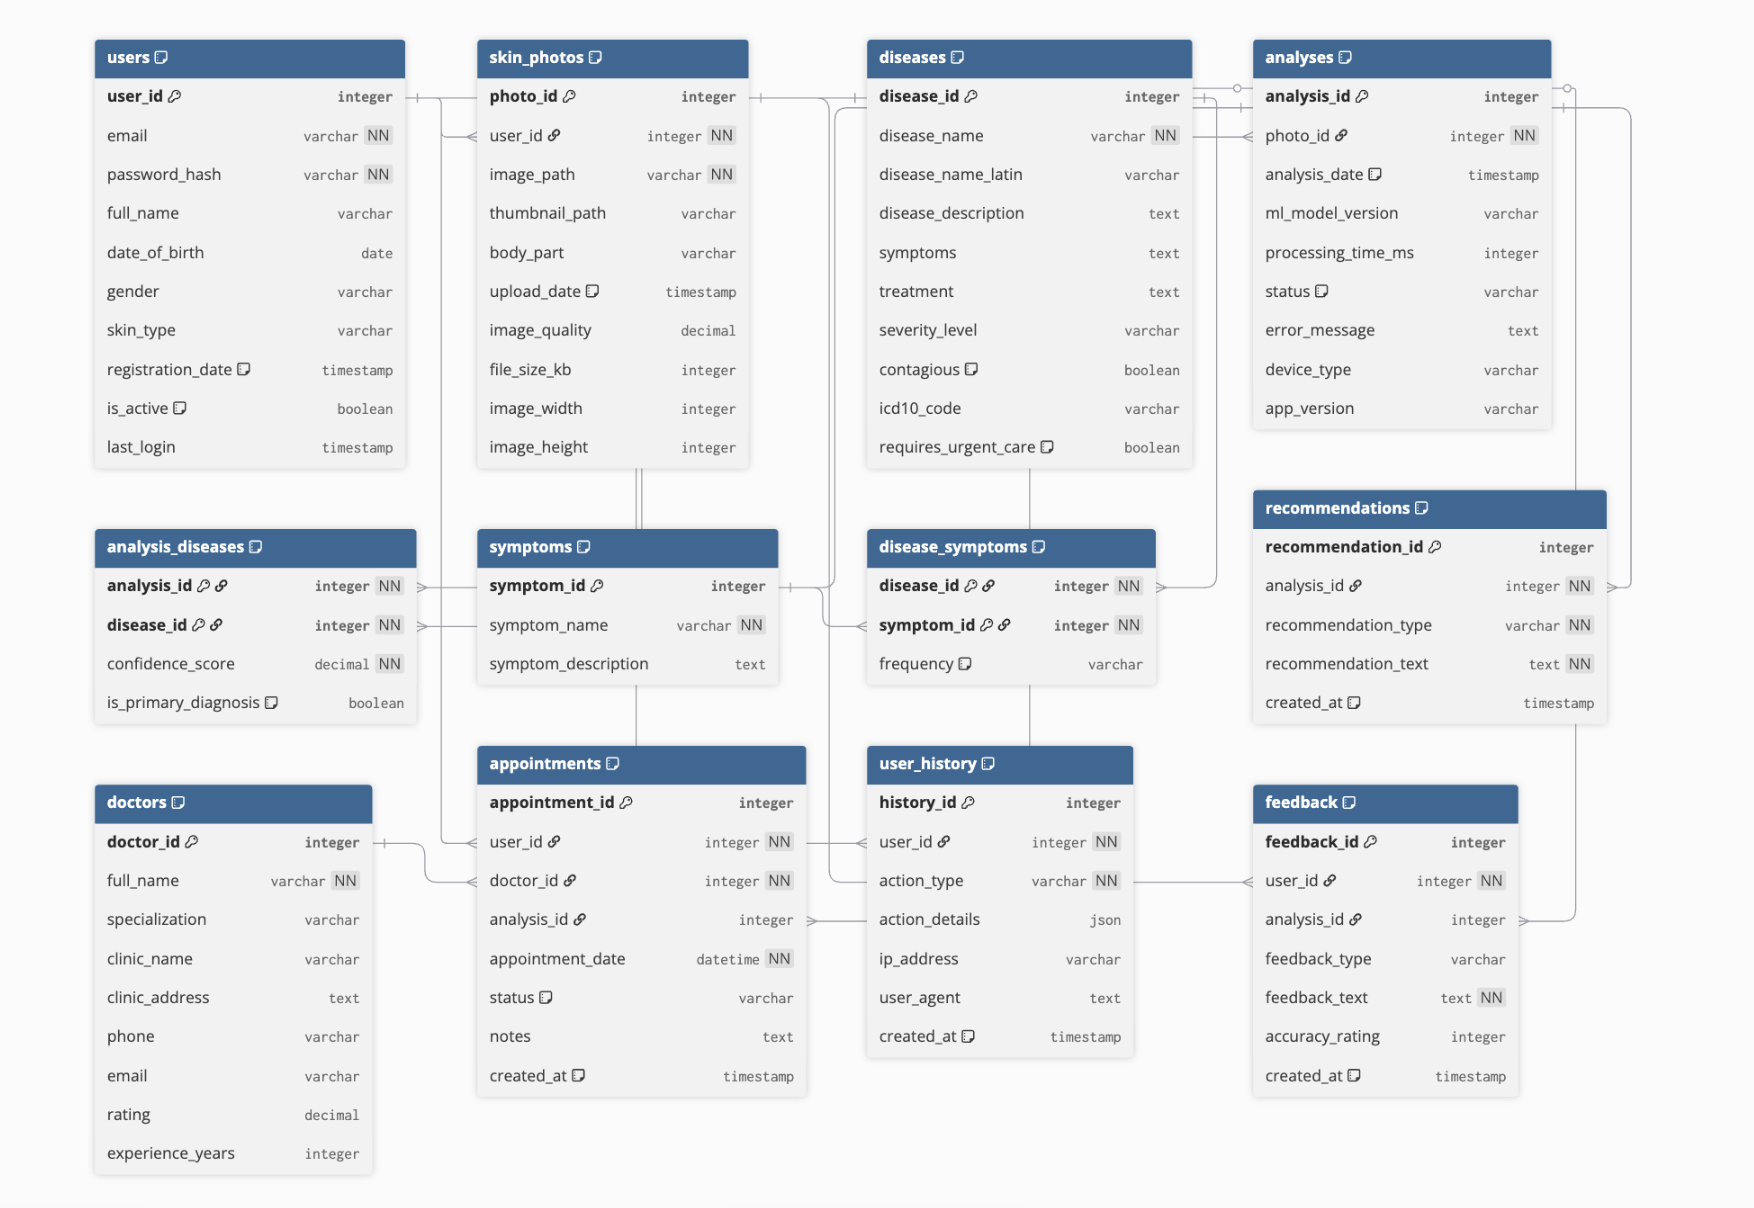

#### **4.3. Примеры запросов к базе данных**



**Получение последних анализов пользователя:**

```sql
SELECT
    a.analysis_id,
    a.analysis_date,
    sp.body_part,
    d.disease_name,
    ad.confidence_score
FROM analyses a
JOIN skin_photos sp ON a.photo_id = sp.photo_id
LEFT JOIN analysis_diseases ad ON a.analysis_id = ad.analysis_id
LEFT JOIN diseases d ON ad.disease_id = d.disease_id
WHERE sp.user_id = 1
    AND ad.is_primary_diagnosis = TRUE
ORDER BY a.analysis_date DESC
LIMIT 10;
```

Данный запрос извлекает историю последних десяти анализов фотографий кожи для пользователя с идентификатором 1, отображая для каждого анализа его номер, дату проведения, часть тела на фотографии, название выявленного заболевания и степень уверенности системы в диагнозе.

Запрос объединяет данные из четырех таблиц: основная таблица анализов соединяется с таблицей фотографий для получения информации о части тела и принадлежности фото конкретному пользователю, затем через левое соединение добавляются результаты диагностики и справочник заболеваний для получения названий болезней. В условиях фильтрации указано, что выбираются только записи пользователя с идентификатором 1 и только основные диагнозы, исключая альтернативные варианты.

Результаты сортируются по дате анализа в обратном хронологическом порядке, чтобы самые свежие анализы отображались первыми, и ограничиваются десятью записями. Такой запрос типично используется для отображения истории диагностики в личном кабинете пользователя мобильного приложения, позволяя быстро просмотреть последние результаты анализов кожных заболеваний.

**Статистика по наиболее часто диагностируемым заболеваниям:**

```sql
SELECT
    d.disease_name,
    d.severity_level,
    COUNT(ad.analysis_id) as diagnosis_count,
    AVG(ad.confidence_score) as avg_confidence
FROM diseases d
JOIN analysis_diseases ad ON d.disease_id = ad.disease_id
WHERE ad.is_primary_diagnosis = TRUE
GROUP BY d.disease_id, d.disease_name, d.severity_level
ORDER BY diagnosis_count DESC
LIMIT 20;
```

Данный запрос формирует статистический отчет по наиболее часто диагностируемым кожным заболеваниям в системе мобильного приложения для классификации болезней кожи. Запрос извлекает информацию из таблицы заболеваний и связанной с ней таблицы результатов анализов, подсчитывая количество диагностирований каждого заболевания и вычисляя среднюю степень уверенности системы в постановке диагноза. Из таблицы diseases берется название заболевания и уровень его серьезности, которые соединяются с данными из таблицы analysis_diseases через идентификатор заболевания. Важной особенностью является фильтрация только по основным диагнозам, исключая альтернативные варианты, которые система могла предложить с меньшей вероятностью. Результаты группируются по каждому уникальному заболеванию, что позволяет агрегировать данные и получить общее количество случаев диагностирования и среднюю уверенность модели машинного обучения для каждого заболевания. Сортировка по убыванию количества диагнозов позволяет увидеть наиболее распространенные заболевания в начале списка, а ограничение в 20 записей фокусирует внимание на самых частых случаях. Такой запрос полезен для анализа работы приложения, выявления наиболее распространенных кожных проблем среди пользователей и оценки точности работы алгоритма классификации для различных типов заболеваний.

### **5. Типовые ошибки при проектировании БД и их исправление**

#### **Ошибка 1. Хранение вычисляемых значений**

**Неправильно:**
| order_id | product_price | quantity | total_price |
|----------|---------------|----------|-------------|
| 1 | 1000 | 2 | 2000 |
| 2 | 1500 | 3 | 4500 |

**Проблема:** total_price можно вычислить как product_price * quantity. Хранение вычисляемых значений приводит к возможным несоответствиям данных.

**Правильно:**
| order_id | product_price | quantity |
|----------|---------------|----------|
| 1 | 1000 | 2 |
| 2 | 1500 | 3 |

Total_price вычисляется при необходимости: `SELECT product_price * quantity AS total_price...`

#### **Ошибка 2. Использование имен полей как данных**

**Неправильно:**
| user_id | jan_2025_sales | feb_2025_sales | mar_2025_sales |
|---------|----------------|----------------|----------------|
| 1 | 10000 | 15000 | 12000 |
| 2 | 8000 | 9000 | 11000 |

**Проблема:** При добавлении нового месяца нужно изменять структуру таблицы.

**Правильно:**
| user_id | month | year | sales |
|---------|-------|------|-------|
| 1 | 1 | 2025 | 10000 |
| 1 | 2 | 2025 | 15000 |
| 1 | 3 | 2025 | 12000 |
| 2 | 1 | 2025 | 8000 |
| 2 | 2 | 2025 |